In [1]:
# Imporiting different required tools
import numpy as np 
import pandas as pd
import numpy.matlib
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt 
%matplotlib inline

c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#Importing data made and obtained from matlab 

current_df = pd.read_csv('./data_collected_current.csv',header = None).T
current_df_f = pd.read_csv('./data_collected_current_wpf.csv',header = None).T
current_df_fft = pd.read_csv('./data_collected_current_fft.csv',header = None).T


vibration_df = pd.read_csv('./data_collected_vibration.csv',header = None).T
vibration_df_f = pd.read_csv('./data_collected_vibration_wpf.csv',header = None).T
vibration_df_fft = pd.read_csv('./data_collected_vibration_fft.csv',header = None).T


force_df = pd.read_csv('./data_collected_force.csv',header = None).T
force_df_f = pd.read_csv('./data_collected_force_wpf.csv',header = None).T
force_df_fft = pd.read_csv('./data_collected_force_fft.csv',header = None).T


speed_df = pd.read_csv('./data_collected_speed.csv',header = None).T
speed_df_f = pd.read_csv('./data_collected_speed_wpf.csv',header = None).T
speed_df_fft = pd.read_csv('./data_collected_speed_fft.csv',header = None).T


torque_df = pd.read_csv('./data_collected_torque.csv',header = None).T
torque_df_f = pd.read_csv('./data_collected_torque_wpf.csv',header = None).T
torque_df_fft = pd.read_csv('./data_collected_torque_fft.csv',header = None).T


In [3]:
current_df_encf_fft = pd.read_csv('./current_fft_200_20_100.csv',header = None).T
speed_df_encf_fft = pd.read_csv('./speed_fft_200_20_100.csv',header = None).T 
torque_df_encf_fft = pd.read_csv('./torque_fft_200_20_100.csv',header = None).T
force_df_encf_fft = pd.read_csv('./force_fft_200_20_100.csv',header = None).T
vibration_df_encf_fft = pd.read_csv('./vibration_fft_200_20_100.csv',header = None).T

In [4]:
current_df_encf = pd.read_csv('./current_results_200_20_100.csv',header = None).T
speed_df_encf = pd.read_csv('./speed_results_200_20_100.csv',header = None).T 
torque_df_encf = pd.read_csv('./torque_results_200_20_100.csv',header = None).T
force_df_encf = pd.read_csv('./force_results_200_20_100.csv',header = None).T
vibration_df_encf = pd.read_csv('./vibration_results_200_20_100.csv',header = None).T

In [5]:

current_df_enc = current_df_encf.T.iloc[0:-1,:].append(current_df_encf_fft.T).T
speed_df_enc = speed_df_encf.T.iloc[0:-1,:].append(speed_df_encf_fft.T).T
torque_df_enc = torque_df_encf.T.iloc[0:-1,:].append(torque_df_encf_fft.T).T
force_df_enc = force_df_encf.T.iloc[0:-1,:].append(force_df_encf_fft.T).T
vibration_df_enc = vibration_df_encf.T.iloc[0:-1,:].append(vibration_df_encf_fft.T).T

In [6]:
current_df_f

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,99.931,0.005180,0.020577,0.004210,0.008923,0.004722,0.020552,0.004902,1.1836,1.7077,-1.71310,0.82272,6.0459,1.8111,9.0,7.0,10.0,1.0
1,99.935,0.004766,0.020531,0.004895,0.007685,0.003589,0.018670,0.004661,1.2154,1.8003,-1.73040,0.87503,6.0453,1.9052,9.0,7.0,10.0,1.0
2,99.858,0.042091,0.033761,0.008578,0.021689,0.008124,0.021287,0.006733,3.5965,1.7564,9.75260,0.47434,146.0100,1.8266,9.0,7.0,10.0,1.0
3,99.860,0.041391,0.029629,0.008630,0.022812,0.009283,0.022210,0.005987,3.4739,1.7762,8.44030,0.43992,128.6200,1.9926,9.0,7.0,10.0,1.0
4,99.872,0.034883,0.028472,0.008940,0.020509,0.009018,0.019787,0.006516,3.2913,1.6730,7.76470,0.33892,117.8900,1.7333,9.0,7.0,10.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,99.772,0.016507,0.068552,0.011685,0.038936,0.010792,0.070989,0.011033,1.3515,1.7216,-0.44169,0.61649,4.5085,1.6072,15.0,1.0,10.0,4.0
956,99.785,0.018700,0.069274,0.011132,0.034792,0.008290,0.063610,0.008832,2.2338,1.7738,2.56100,0.63252,35.9630,1.6886,15.0,1.0,10.0,4.0
957,99.755,0.019345,0.077032,0.014830,0.037390,0.012023,0.071485,0.013179,2.0230,1.7636,0.74401,0.70661,15.5300,1.7335,15.0,1.0,10.0,4.0
958,99.770,0.016060,0.073758,0.007781,0.041497,0.008724,0.069745,0.012412,1.5398,1.7402,-0.56443,0.56690,5.3604,1.5684,15.0,1.0,10.0,4.0


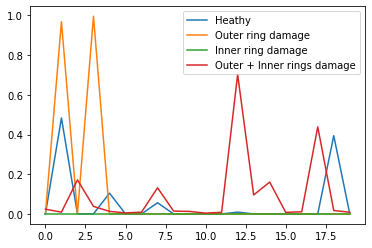

In [31]:
plt.plot(current_df_enc.iloc[0,0:current_df_encf.shape[1]-4],label='Heathy')
plt.plot(current_df_enc.iloc[241,0:current_df_encf.shape[1]-4],label = 'Outer ring damage')
plt.plot(current_df_enc.iloc[482,0:current_df_encf.shape[1]-4],label = 'Inner ring damage')
plt.plot(current_df_enc.iloc[760,0:current_df_encf.shape[1]-4],label = 'Outer + Inner rings damage')

plt.legend()

In [41]:
x_axis = np.linspace(1,20,20)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20.])

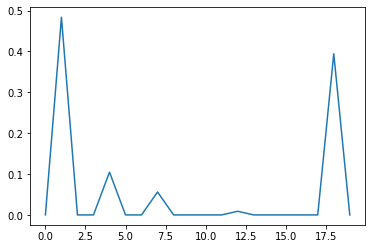

In [50]:
plt.plot(current_df_enc.iloc[0,0:current_df_encf.shape[1]-4].values)

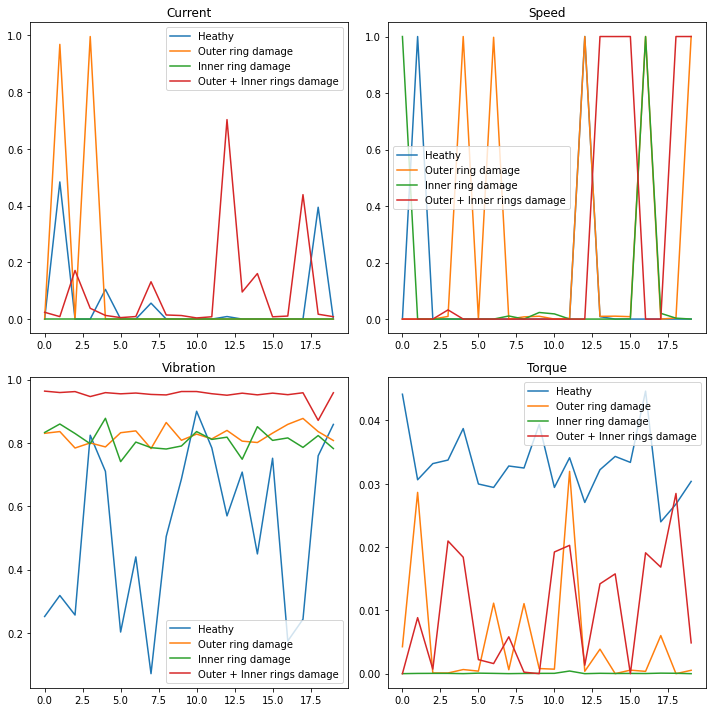

In [6]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# plot time signal:
axs[0, 0].set_title("Current")
axs[0, 0].plot(current_df_encf.iloc[0,0:current_df_encf.shape[1]-4].values,label='Heathy')
axs[0, 0].plot(current_df_encf.iloc[241,0:current_df_encf.shape[1]-4],label = 'Outer ring damage')
axs[0, 0].plot(current_df_encf.iloc[482,0:current_df_encf.shape[1]-4],label = 'Inner ring damage')
axs[0, 0].plot(current_df_encf.iloc[760,0:current_df_encf.shape[1]-4],label = 'Outer + Inner rings damage')
axs[0, 0].legend()


# plot different spectrum types:
axs[1, 0].set_title("Vibration")
axs[1, 0].plot(vibration_df_encf.iloc[0,0:vibration_df_encf.shape[1]-4],label='Heathy')
axs[1, 0].plot(vibration_df_encf.iloc[241,0:vibration_df_encf.shape[1]-4],label = 'Outer ring damage')
axs[1, 0].plot(vibration_df_encf.iloc[482,0:vibration_df_encf.shape[1]-4],label = 'Inner ring damage')
axs[1, 0].plot(vibration_df_encf.iloc[760,0:vibration_df_encf.shape[1]-4],label = 'Outer + Inner rings damage')
axs[1, 0].legend()

axs[1, 1].set_title("Torque")
axs[1, 1].plot(torque_df_encf.iloc[0,0:torque_df_encf.shape[1]-4],label='Heathy')
axs[1, 1].plot(torque_df_encf.iloc[241,0:torque_df_encf.shape[1]-4],label = 'Outer ring damage')
axs[1, 1].plot(torque_df_encf.iloc[482,0:torque_df_encf.shape[1]-4],label = 'Inner ring damage')
axs[1, 1].plot(torque_df_encf.iloc[760,0:torque_df_encf.shape[1]-4],label = 'Outer + Inner rings damage')
axs[1, 1].legend()

axs[0, 1].set_title("Speed")
axs[0, 1].plot(speed_df_encf.iloc[0,0:speed_df_encf.shape[1]-4],label='Heathy')
axs[0, 1].plot(speed_df_encf.iloc[241,0:speed_df_encf.shape[1]-4],label = 'Outer ring damage')
axs[0, 1].plot(speed_df_encf.iloc[482,0:speed_df_encf.shape[1]-4],label = 'Inner ring damage')
axs[0, 1].plot(speed_df_encf.iloc[760,0:current_df_encf.shape[1]-4],label = 'Outer + Inner rings damage')
axs[0, 1].legend()


fig.tight_layout()
plt.savefig('fftFeaturesPlots', dpi=400)

plt.show()




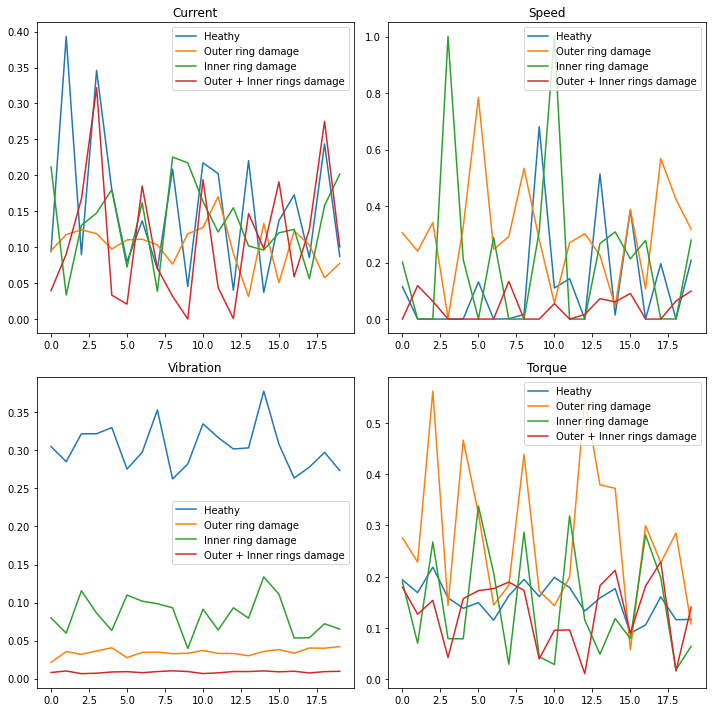

In [69]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# plot time signal:
axs[0, 0].set_title("Current")
axs[0, 0].plot(current_df_encf_fft.iloc[0,0:current_df_encf.shape[1]-4].values,label='Heathy')
axs[0, 0].plot(current_df_encf_fft.iloc[241,0:current_df_encf.shape[1]-4],label = 'Outer ring damage')
axs[0, 0].plot(current_df_encf_fft.iloc[482,0:current_df_encf.shape[1]-4],label = 'Inner ring damage')
axs[0, 0].plot(current_df_encf_fft.iloc[760,0:current_df_encf.shape[1]-4],label = 'Outer + Inner rings damage')
axs[0, 0].legend()


# plot different spectrum types:
axs[1, 0].set_title("Vibration")
axs[1, 0].plot(vibration_df_encf_fft.iloc[0,0:vibration_df_encf.shape[1]-4],label='Heathy')
axs[1, 0].plot(vibration_df_encf_fft.iloc[241,0:vibration_df_encf.shape[1]-4],label = 'Outer ring damage')
axs[1, 0].plot(vibration_df_encf_fft.iloc[482,0:vibration_df_encf.shape[1]-4],label = 'Inner ring damage')
axs[1, 0].plot(vibration_df_encf_fft.iloc[760,0:vibration_df_encf.shape[1]-4],label = 'Outer + Inner rings damage')
axs[1, 0].legend()

axs[1, 1].set_title("Torque")
axs[1, 1].plot(torque_df_encf_fft.iloc[0,0:torque_df_encf.shape[1]-4],label='Heathy')
axs[1, 1].plot(torque_df_encf_fft.iloc[241,0:torque_df_encf.shape[1]-4],label = 'Outer ring damage')
axs[1, 1].plot(torque_df_encf_fft.iloc[482,0:torque_df_encf.shape[1]-4],label = 'Inner ring damage')
axs[1, 1].plot(torque_df_encf_fft.iloc[760,0:torque_df_encf.shape[1]-4],label = 'Outer + Inner rings damage')
axs[1, 1].legend()

axs[0, 1].set_title("Speed")
axs[0, 1].plot(speed_df_encf_fft.iloc[0,0:speed_df_encf.shape[1]-4],label='Heathy')
axs[0, 1].plot(speed_df_encf_fft.iloc[241,0:speed_df_encf.shape[1]-4],label = 'Outer ring damage')
axs[0, 1].plot(speed_df_encf_fft.iloc[482,0:speed_df_encf.shape[1]-4],label = 'Inner ring damage')
axs[0, 1].plot(speed_df_encf_fft.iloc[760,0:current_df_encf.shape[1]-4],label = 'Outer + Inner rings damage')
axs[0, 1].legend()


fig.tight_layout()
plt.savefig('envFeaturesPlots', dpi=400)
plt.show()



In [ ]:
def multipleSignalsPlot(arr):
    mysignals = [{'name': 'Signal1', 'x': np.arange(10,20,1),
                 'y': np.random.rand(10), 'color':'r', 'linewidth':1},
                {'name': 'Signal2', 'x': np.arange(10,20,1),
                 'y': np.random.rand(10), 'color':'b', 'linewidth':3},
                {'name': 'Signal3', 'x': np.arange(10,20,1),
                 'y': np.random.rand(10), 'color':'k', 'linewidth':2}]

    fig, ax = plt.subplots()
    for signal in mysignals:
        ax.plot(signal['x'], signal['y'], 
                color=signal['color'], 
                linewidth=signal['linewidth'],
                label=signal['name'])

    # Enable legend
    ax.legend()
    ax.set_title("My graph")
    plt.show()

In [6]:
vibration_df

,0,1,2,3,4,5,6,7,8,9,...,4994,4995,4996,4997,4998,4999,5000,5001,5002,5003
0,0.516080,0.112850,0.503920,0.386250,0.080993,0.442310,0.668720,0.519350,0.087581,0.140990,...,1.210900,0.357920,0.332070,0.223500,0.513370,0.826410,9.0,7.0,10.0,1.0
1,1.333700,0.571370,0.002093,0.484090,1.206800,0.916280,0.322600,0.700190,0.009046,0.637830,...,0.173100,0.045327,0.356690,0.592230,0.041014,1.095800,9.0,7.0,10.0,1.0
2,0.162620,0.116930,0.308340,0.598360,0.227100,0.442700,0.589050,0.065422,0.286700,0.043757,...,0.102510,0.007892,0.140830,0.144330,0.027116,0.028368,9.0,7.0,10.0,1.0
3,-0.000633,0.051921,0.059317,0.028802,0.030773,0.042357,0.054621,0.020763,0.071052,0.139760,...,0.080304,0.030482,0.079099,0.029796,0.065084,0.073147,9.0,7.0,10.0,1.0
4,0.647420,0.208500,0.725590,0.834020,0.267910,0.286910,0.231240,1.218700,1.257400,0.088175,...,0.443400,0.437670,0.127600,0.301540,0.272540,0.742600,9.0,7.0,10.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,0.274080,0.282440,0.229030,0.205320,0.204380,0.208300,0.334230,0.376630,0.430200,0.453620,...,0.297060,0.207600,0.215430,0.232720,0.192290,0.261970,15.0,1.0,10.0,4.0
956,0.136660,0.220570,0.166680,0.122340,0.096420,0.066462,0.061445,0.100790,0.069189,0.084278,...,0.219180,0.194420,0.123610,0.063985,0.051773,0.072144,15.0,1.0,10.0,4.0
957,0.354060,0.381720,0.355280,0.456320,0.388870,0.406160,0.430200,0.447230,0.525310,0.425250,...,0.268390,0.302880,0.311590,0.433500,0.393710,0.132500,15.0,1.0,10.0,4.0
958,0.359150,0.224600,0.220150,0.291340,0.298290,0.277620,0.303500,0.271760,0.257820,0.171230,...,0.478340,0.383650,0.372730,0.383030,0.280900,0.429250,15.0,1.0,10.0,4.0


In [7]:
current_df_enc.sample(frac=1).reset_index(drop=True)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,6.427500e-05,1.175400e-05,4.880800e-04,1.220000e-04,2.147300e-05,4.738200e-06,1.265000e-05,3.349200e-04,1.616500e-05,2.093900e-05,...,0.188650,0.140420,0.215650,0.183580,0.143890,0.193340,15.0,7.0,4.0,4.0
1,1.000000e+00,9.997200e-01,1.000000e+00,1.000000e+00,9.999900e-01,1.000000e+00,1.000000e+00,9.999400e-01,1.000000e+00,1.000000e+00,...,0.008397,0.010221,0.014802,0.012669,0.014648,0.015278,15.0,1.0,10.0,1.0
2,1.083000e-04,2.081300e-05,9.010700e-04,2.042600e-04,3.802900e-05,8.600700e-06,2.204800e-05,6.447900e-04,3.061700e-05,3.771700e-05,...,0.218360,0.141070,0.115430,0.173190,0.243670,0.210030,15.0,7.0,10.0,4.0
3,3.341100e-12,1.927700e-03,1.267600e-10,2.921300e-11,2.009100e-05,1.843800e-09,1.049400e-13,5.494900e-05,9.325100e-11,6.493800e-09,...,0.144580,0.131630,0.138540,0.177000,0.165400,0.168070,15.0,7.0,4.0,1.0
4,6.573500e-05,1.154600e-05,5.675900e-04,1.267600e-04,2.186500e-05,4.689200e-06,1.258700e-05,4.013800e-04,1.707800e-05,2.184400e-05,...,0.162720,0.150250,0.111280,0.126570,0.134970,0.179540,15.0,7.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,4.093300e-11,4.249400e-11,8.208000e-11,5.204200e-10,3.830300e-11,2.831200e-11,3.196900e-11,3.526600e-11,4.296700e-24,5.931300e-11,...,0.084992,0.149590,0.217820,0.041517,0.141960,0.180440,15.0,7.0,4.0,3.0
956,7.381300e-12,7.264100e-12,1.457100e-11,1.133500e-10,7.493200e-12,5.562600e-12,5.889000e-12,6.545500e-12,3.380300e-27,1.042100e-11,...,0.083800,0.165050,0.212340,0.060699,0.200850,0.179460,15.0,7.0,10.0,3.0
957,9.999900e-01,1.000000e+00,9.998900e-01,9.999800e-01,1.000000e+00,1.000000e+00,1.000000e+00,9.999300e-01,1.000000e+00,1.000000e+00,...,0.006136,0.009445,0.005747,0.008896,0.007803,0.008457,15.0,1.0,10.0,4.0
958,9.999900e-01,1.000000e+00,9.999100e-01,9.999800e-01,1.000000e+00,1.000000e+00,1.000000e+00,9.999400e-01,1.000000e+00,1.000000e+00,...,0.003567,0.004438,0.003568,0.005498,0.004010,0.004651,15.0,1.0,10.0,4.0


In [6]:
# Function for data normalization

def normalizeData(data):
    
    d_x  = data.iloc[:,0:data.shape[1]-1]
    d_x
    d_y = data.iloc[:,-1]
    
    d_x = StandardScaler().fit_transform(d_x)
  # d_x=(df_x-df_x.min())/(df_x.max()-df_x.min())
    d_x = pd.DataFrame(d_x)
    d_x
    return pd.concat([d_x,d_y], axis=1)


In [7]:
# Plot function
def plotFeatures(data,xIndex,yIndex,normalizeOrNot,name):
 if(normalizeOrNot):
    data = normalizeData(data)
    
 
 ax = data.iloc[200:219][data.iloc[:,-1] == 1].plot(kind='scatter', x=xIndex, y= yIndex, color='DarkBlue', label='HEALTHY');
 data.iloc[440:459][data.iloc[:,-1] == 2].plot(kind='scatter', x=xIndex, y=yIndex, color='red', label='OR',ax = ax);
 data.iloc[680:699][data.iloc[:,-1] == 3].plot(kind='scatter', x=xIndex, y=yIndex, color='green', label='IR',ax = ax);
 data.iloc[920:939][data.iloc[:,-1] == 4].plot(kind='scatter', x=xIndex, y=yIndex, color='yellow', label='OR+IR',ax = ax);
    
 data.iloc[200:219][data.iloc[:,-1] == 1].plot(kind='line', x=xIndex, y= yIndex, color='DarkBlue', legend = False,ax = ax);
 data.iloc[440:459][data.iloc[:,-1] == 2].plot(kind='line', x=xIndex, y=yIndex, color='red', legend = False,ax = ax);
 data.iloc[680:699][data.iloc[:,-1] == 3].plot(kind='line', x=xIndex, y=yIndex, color='green', legend = False,ax = ax);
 data.iloc[920:939][data.iloc[:,-1] == 4].plot(kind='line', x=xIndex, y=yIndex, color='yellow', legend = False,ax = ax);
 plt.xlabel('Energy coefficient number ' + str(xIndex + 1) + ' of wpd')
 plt.ylabel("Crest Factor")
 plt.rcParams['figure.figsize'] = [8, 8]
 plt.savefig(name + '.jpg', dpi=200)
 fig = plt.figure() 
 
 plt.show()

In [7]:
# function returns input and output for a given data
def splitData(data):
    X = data.iloc[:,0:data.shape[1]-1]
    Y = data.iloc[:,-1]
    return X,pd.DataFrame(Y)

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

def accuracyTable(yTest,yHat,algoName,measurement):
    a =  accuracy_score(yTest,yHat);
    j = jaccard_score(yTest,yHat,average = 'weighted' );
    f = f1_score(yTest,yHat,average = 'weighted' );
    accuracy = pd.DataFrame(
    {
    'Measurement':measurement,
    'Algorithm':algoName, 
    'Accuracy score':a,
    'Jaccard score':j,
    'F1 score':f,
    },
    index = ['']
    )
    return accuracy

In [9]:
from sklearn import svm

def svmLearning(data,measurement,kernel,testSize,normalize):
    if (normalize):
      data = normalizeData(data)
    X,y = splitData(data)
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=testSize, random_state=42 , shuffle = True)
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_train, y_train) 
    yhat = clf.predict(X_test)
    confusionMatrix = confusion_matrix(y_test, yhat)
    accuracy = accuracyTable(y_test,yhat,'SVM',measurement)
    comparision = pd.DataFrame({'State':y_test.iloc[:,-1].values,'Predicted State':yhat})
    return accuracy , comparision.T , confusionMatrix

In [10]:
from sklearn.linear_model import LogisticRegression

def lrLearning(data,measurement,c,solver,testSize,normalize):
    if (normalize):
      data = normalizeData(data)
    X,y = splitData(data)
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=testSize, random_state=42 , shuffle = True)
    LR = LogisticRegression(C=c ,solver=solver).fit(X_train,y_train)
    yhat = LR.predict(X_test)
    accuracy = accuracyTable(y_test,yhat,'Logistic Regression',measurement)
    comparision = pd.DataFrame({'State':y_test.iloc[:,-1].values,'Predicted State':yhat})
    return accuracy , comparision.T

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

def kShooser(data,k,testSize,normalize):
    if (normalize):
      data = normalizeData(data)
    X,y = splitData(data)
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=testSize, random_state=42 , shuffle = True)
    Ks = k
    mean_acc = np.zeros((Ks-1))

    for n in range(1,Ks):

        neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
        yhat=neigh.predict(X_test)
        mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)


    mean_acc

    plt.plot(range(1,Ks),mean_acc,'g')
    plt.legend(('Accuracy'))
    plt.ylabel('Accuracy ')
    plt.xlabel('Number of Neighbors (K)')
    plt.tight_layout()
    plt.show()
    
def knnLearning(data,measurement,k,testSize,normalize):
    if (normalize):
      data = normalizeData(data)
    X,y = splitData(data)
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=testSize, random_state=42 , shuffle = True)
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)                            
    yhat=neigh.predict(X_test)
    confusionMatrix = confusion_matrix(y_test, yhat)
    accuracy = accuracyTable(y_test,yhat,'KNN',measurement)
    comparision = pd.DataFrame({'State':y_test.iloc[:,-1].values,'Predicted State':yhat})
    return accuracy , comparision.T 

In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

def mlpLearning(data,measurement,hl,maxIter,testSize,normalize):
    if (normalize):
      data = normalizeData(data)
    X,y = splitData(data)
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=testSize, random_state=42 , shuffle = True)
    clf = MLPClassifier(hidden_layer_sizes=hl ,random_state=1, max_iter=maxIter).fit(X_train, y_train)                        
    yhat=clf.predict(X_test)
    confusionMatrix = confusion_matrix(y_test, yhat)
    accuracy = accuracyTable(y_test,yhat,'MLP',measurement)
    comparision = pd.DataFrame({'State':y_test.iloc[:,-1].values,'Predicted State':yhat})
    return accuracy , comparision.T 

In [27]:
accuracy_force,comparision_force,confusionMatrix_f = svmLearning(force_df,'Force signal','rbf',0.3,True)
accuracy_current,comparision_current,confusionMatrix_c  = svmLearning(current_df,'Current signal','rbf',0.3,True)
accuracy_torque,comparision_torque,confusionMatrix_t  = svmLearning(torque_df,'Torque signal','rbf',0.3,True)
accuracy_speed,comparision_speed,confusionMatrix_s  = svmLearning(normalizeData(speed_df),'Speed signal','rbf',0.3,True)
accuracy_vibration,comparision_vibration,confusionMatrix_v  = svmLearning(vibration_df,'Vibration signal ','rbf',0.3,True)
all = accuracy_force.append([accuracy_current,accuracy_torque,accuracy_speed,accuracy_vibration])
all

c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed w

,Measurement,Algorithm,Accuracy score,Jaccard score,F1 score
,Force signal,SVM,0.510417,0.326962,0.452922
,Current signal,SVM,0.288194,0.151950,0.259443
,Torque signal,SVM,0.395833,0.222729,0.347313
,Speed signal,SVM,0.218750,0.073877,0.125846
,Vibration signal,SVM,0.517361,0.307840,0.443888


In [18]:
comparision_current.iloc[0,:]

NameError: name 'comparision_current' is not defined

In [19]:
plot_from_data(comparision_current.iloc[0,:],comparision_current.iloc[1,:], columns=['H','OR','IR','OR_IR'], annot=True, cmap=cm_cmap,
      fmt='.2f',x fz=11, lw=1, cbar=False, figsize=[5,5], show_null_values=2, pred_val_axis='lin')

SyntaxError: invalid syntax (<ipython-input-19-a2a467e02072>, line 2)

c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:55: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


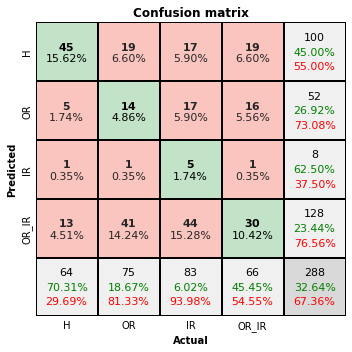

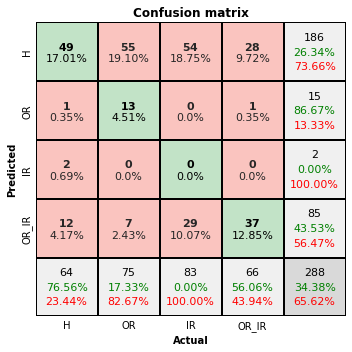

In [76]:
accuracy_force,comparision_force,confusionMatrix_f = svmLearning(force_df_fft,'Force fft signal','rbf',0.3,True)
accuracy_current,comparision_current,confusionMatrix_c  = svmLearning(current_df_fft,'Current fft signal','rbf',0.3,True)
accuracy_torque,comparision_torque,confusionMatrix_t  = svmLearning(torque_df_fft,'Torque fft signal','rbf',0.3,True)
accuracy_speed,comparision_speed,confusionMatrix_s  = svmLearning(normalizeData(speed_df_fft),'Speed fft signal','rbf',0.3,True)
accuracy_vibration,comparision_vibration,confusionMatrix_v  = svmLearning(vibration_df_fft,'Vibration fft signal ','rbf',0.3,True)
all = accuracy_force.append([accuracy_current,accuracy_torque,accuracy_speed,accuracy_vibration])
all

c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed w

,Measurement,Algorithm,Accuracy score,Jaccard score,F1 score
,Force fft signal,SVM,0.868056,0.772394,0.859456
,Current fft signal,SVM,0.486111,0.307821,0.435529
,Torque fft signal,SVM,0.857639,0.751130,0.854226
,Speed fft signal,SVM,0.291667,0.142566,0.241583
,Vibration fft signal,SVM,0.760417,0.620131,0.758500


In [ ]:
accuracy_force,comparision_force = svmLearning(force_df_f,'Force signal fft','rbf',0.3,True)
accuracy_current,comparision_current = svmLearning(current_df_f,'Current signal fft','rbf',0.3,True)
accuracy_torque,comparision_torque = svmLearning(torque_df_f,'Torque signal fft','rbf',0.3,True)
accuracy_speed,comparision_speed = svmLearning(speed_df_f,'Speed signal fft','rbf',0.3,True)
accuracy_vibration,comparision_vibration = svmLearning(vibration_df_f,'Vibration signal fft','rbf',0.3,True)
all = accuracy_force.append([accuracy_current,accuracy_torque,accuracy_speed,accuracy_vibration])
all

In [174]:
accuracy_force,comparision_force,confusionMatrix_f = svmLearning(force_df_encf,'Force signal extracted features ','rbf',0.3,True)
accuracy_current,comparision_current,confusionMatrix_c  = svmLearning(current_df_encf,'Current signal extracted features ','rbf',0.3,True)
accuracy_torque,comparision_torque,confusionMatrix_t  = svmLearning(torque_df_encf,'Torque signal extracted features','rbf',0.3,True)
accuracy_speed,comparision_speed,confusionMatrix_s  = svmLearning(normalizeData(speed_df_encf),'Speed signal extracted features','rbf',0.3,True)
accuracy_vibration,comparision_vibration,confusionMatrix_v  = svmLearning(vibration_df_encf,'Vibration signal extracted features ','rbf',0.3,True)
all = accuracy_force.append([accuracy_current,accuracy_torque,accuracy_speed,accuracy_vibration])
all

c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed w

,Measurement,Algorithm,Accuracy score,Jaccard score,F1 score
,Force signal extracted features,SVM,1.000000,1.000000,1.000000
,Current signal extracted features,SVM,0.288194,0.154030,0.264852
,Torque signal extracted features,SVM,0.409722,0.269558,0.423697
,Speed signal extracted features,SVM,1.000000,1.000000,1.000000
,Vibration signal extracted features,SVM,0.947917,0.904516,0.948487


In [28]:
accuracy_force,comparision_force,confusionMatrix_f = svmLearning(force_df_encf_fft,'Force fft signal extracted features ','rbf',0.3,True)
accuracy_current,comparision_current,confusionMatrix_c  = svmLearning(current_df_encf_fft,'Current fft signal extracted features ','rbf',0.3,True)
accuracy_torque,comparision_torque,confusionMatrix_t  = svmLearning(torque_df_encf_fft,'Torque signal fft extracted features','rbf',0.3,True)
accuracy_speed,comparision_speed,confusionMatrix_s  = svmLearning(normalizeData(speed_df_encf_fft),'Speed signal fft extracted features','rbf',0.3,True)
accuracy_vibration,comparision_vibration,confusionMatrix_v  = svmLearning(vibration_df_encf_fft,'Vibration signal fft extracted features ','rbf',0.3,True)
all = accuracy_force.append([accuracy_current,accuracy_torque,accuracy_speed,accuracy_vibration])
all

c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed w

,Measurement,Algorithm,Accuracy score,Jaccard score,F1 score
,Force fft signal extracted features,SVM,1.000000,1.000000,1.000000
,Current fft signal extracted features,SVM,0.805556,0.693847,0.816518
,Torque signal fft extracted features,SVM,0.982639,0.966536,0.982858
,Speed signal fft extracted features,SVM,0.996528,0.993101,0.996529
,Vibration signal fft extracted features,SVM,0.666667,0.529426,0.665197


In [15]:
accuracy_force,comparision_force,confusionMatrix_f = svmLearning(force_df_enc,'Force signal all extracted features ','rbf',0.3,True)
accuracy_current,comparision_current,confusionMatrix_c  = svmLearning(current_df_enc,'Current signal all extracted features ','rbf',0.3,True)
accuracy_torque,comparision_torque,confusionMatrix_t  = svmLearning(torque_df_enc,'Torque signal fft all extracted features','rbf',0.3,True)
accuracy_speed,comparision_speed,confusionMatrix_s  = svmLearning(normalizeData(speed_df_enc),'Speed signal all extracted features','rbf',0.3,True)
accuracy_vibration,comparision_vibration,confusionMatrix_v  = svmLearning(vibration_df_enc,'Vibration signal all extracted features ','rbf',0.3,True)
all = accuracy_force.append([accuracy_current,accuracy_torque,accuracy_speed,accuracy_vibration])
all

c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed w

,Measurement,Algorithm,Accuracy score,Jaccard score,F1 score
,Force signal all extracted features,SVM,1.000000,1.000000,1.000000
,Current signal all extracted features,SVM,0.788194,0.658478,0.793367
,Torque signal fft all extracted features,SVM,0.934028,0.879461,0.934755
,Speed signal all extracted features,SVM,1.000000,1.000000,1.000000
,Vibration signal all extracted features,SVM,0.975694,0.953464,0.975913


c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:55: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


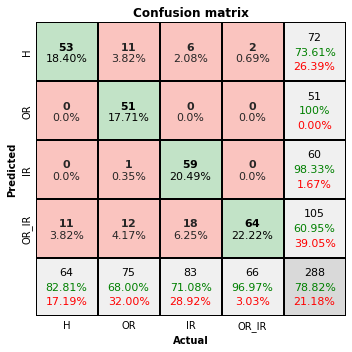

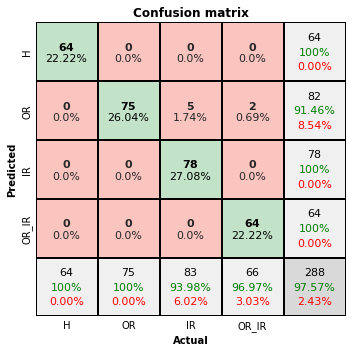

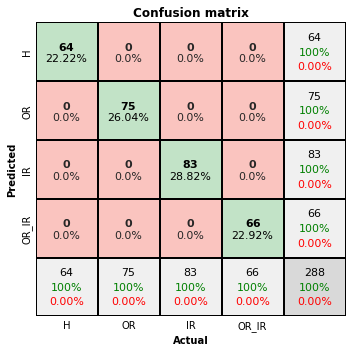

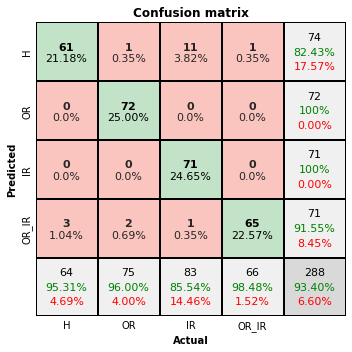

In [18]:


plot_from_data(comparision_current.iloc[0,:],comparision_current.iloc[1,:], columns=['H','OR','IR','OR_IR'], annot=True, cmap=cm_cmap,
     figname = 'prc_svm.jpg', fmt='.2f', fz=11, lw=1, cbar=False, figsize=[5,5], show_null_values=2, pred_val_axis='lin')
plot_from_data(comparision_vibration.iloc[0,:],comparision_vibration.iloc[1,:], columns=['H','OR','IR','OR_IR'], annot=True, cmap=cm_cmap,
      figname = 'prv_svm.jpg',fmt='.2f', fz=11, lw=1, cbar=False, figsize=[5,5], show_null_values=2, pred_val_axis='lin')
plot_from_data(comparision_speed.iloc[0,:],comparision_speed.iloc[1,:], columns=['H','OR','IR','OR_IR'], annot=True, cmap=cm_cmap,
      figname = 'prs_svm.jpg',fmt='.2f', fz=11, lw=1, cbar=False, figsize=[5,5], show_null_values=2, pred_val_axis='lin')
plot_from_data(comparision_torque.iloc[0,:],comparision_torque.iloc[1,:], columns=['H','OR','IR','OR_IR'], annot=True, cmap=cm_cmap,
      figname = 'prt_svm.jpg',fmt='.2f', fz=11, lw=1, cbar=False, figsize=[5,5], show_null_values=2, pred_val_axis='lin')



In [132]:
accuracy_force,comparision_force,confusion_matrix_f = lrLearning(force_df,'Force signal',0.05,'lbfgs',0.3,True)
accuracy_current,comparision_current,confusion_matrix_c = lrLearning(current_df,'Current signal',0.05,'lbfgs',0.3,True)
accuracy_torque,comparision_torque,,confusion_matrix_t = lrLearning(torque_df,'Torque signal',0.05,'lbfgs',0.3,True)
accuracy_speed,comparision_speed,confusion_matrix_s = lrLearning(speed_df,'Speed signal',0.05,'lbfgs',0.3,True)
accuracy_vibration,comparision_vibration,confusion_matrix_v = lrLearning(vibration_df,'Vibration signal ',0.05,'lbfgs',0.3,True)
all = accuracy_force.append([accuracy_current,accuracy_torque,accuracy_speed,accuracy_vibration])
all

c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sc

,Measurement,Algorithm,Accuracy score,Jaccard score,F1 score
,Force signal,Logistic Regression,0.309028,0.184052,0.310331
,Current signal,Logistic Regression,0.225694,0.120988,0.214384
,Torque signal,Logistic Regression,0.295139,0.172658,0.293499
,Speed signal,Logistic Regression,0.211806,0.090901,0.158348
,Vibration signal,Logistic Regression,0.263889,0.153256,0.265551


In [133]:
accuracy_force,comparision_force = lrLearning(force_df_f,'Force features signal',0.05,'lbfgs',0.3,True)
accuracy_current,comparision_current = lrLearning(current_df_f,'Current features signal',0.05,'lbfgs',0.3,True)
accuracy_torque,comparision_torque = lrLearning(torque_df_f,'Torque features signal',0.05,'lbfgs',0.3,True)
accuracy_speed,comparision_speed = lrLearning(speed_df_f,'Speed features signal',0.05,'lbfgs',0.3,True)
accuracy_vibration,comparision_vibration = lrLearning(vibration_df_f,'Vibration features signal ',0.05,'lbfgs',0.3,True)
all = accuracy_force.append([accuracy_current,accuracy_torque,accuracy_speed,accuracy_vibration])
all

c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed w

,Measurement,Algorithm,Accuracy score,Jaccard score,F1 score
,Force features signal,Logistic Regression,0.375000,0.231560,0.365755
,Current features signal,Logistic Regression,0.322917,0.207171,0.332324
,Torque features signal,Logistic Regression,0.465278,0.307281,0.451964
,Speed features signal,Logistic Regression,0.215278,0.096512,0.169642
,Vibration features signal,Logistic Regression,0.614583,0.453589,0.614523


In [19]:
accuracy_force,comparision_force = lrLearning(force_df_encf,'Force features signal',0.05,'lbfgs',0.3,True)
accuracy_current,comparision_current = lrLearning(current_df_encf,'Current features signal',0.05,'lbfgs',0.3,True)
accuracy_torque,comparision_torque = lrLearning(torque_df_encf,'Torque features signal',0.05,'lbfgs',0.3,True)
accuracy_speed,comparision_speed = lrLearning(speed_df_encf,'Speed features signal',0.05,'lbfgs',0.3,True)
accuracy_vibration,comparision_vibration = lrLearning(vibration_df_encf,'Vibration features signal ',0.05,'lbfgs',0.3,True)
all = accuracy_force.append([accuracy_current,accuracy_torque,accuracy_speed,accuracy_vibration])
all

c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed w

,Measurement,Algorithm,Accuracy score,Jaccard score,F1 score
,Force features signal,Logistic Regression,0.927083,0.863767,0.926234
,Current features signal,Logistic Regression,0.315972,0.177299,0.300443
,Torque features signal,Logistic Regression,0.371528,0.229874,0.373489
,Speed features signal,Logistic Regression,0.743056,0.627827,0.762923
,Vibration features signal,Logistic Regression,0.795139,0.664915,0.795968


c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

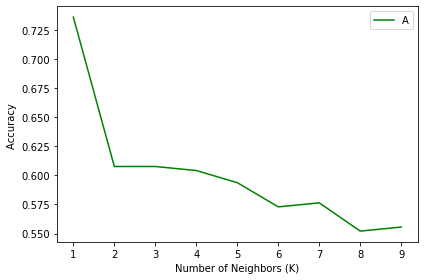

c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

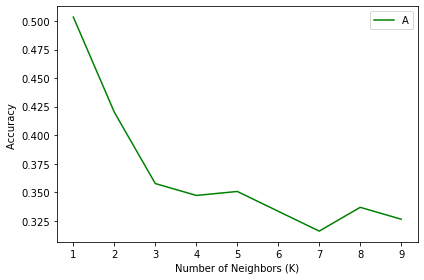

c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

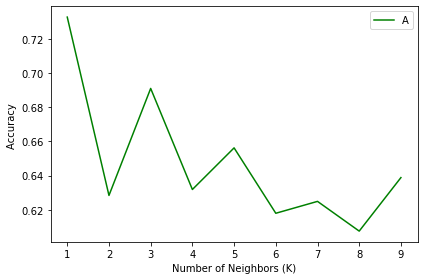

c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

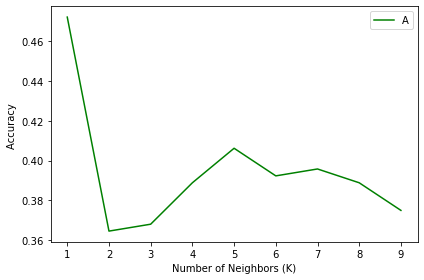

c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

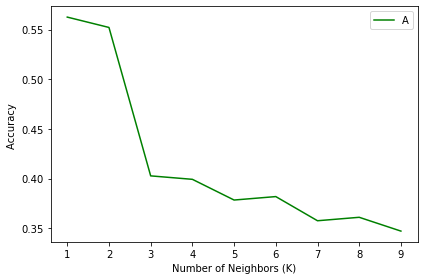

In [53]:
kShooser(force_df,10,0.3,True);
kShooser(current_df,10,0.3,True);
kShooser(torque_df,10,0.3,True);
kShooser(speed_df,10,0.3,True);
kShooser(vibration_df,10,0.3,True);

In [54]:
a_f,c_f = knnLearning(force_df,'Force signal',3,0.3,True);
a_s,c_s = knnLearning(speed_df,'Speed signal',5,0.3,True);
a_c,c_c = knnLearning(current_df,'Current signal',5,0.3,True);
a_t,c_t = knnLearning(torque_df,'Toque signal',5,0.3,True);
a_v,c_v = knnLearning(vibration_df,'Vibration signal',4,0.3,True);

all = a_f.append([a_s,a_c,a_t,a_v])
all

c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

,Measurement,Algorithm,Accuracy score,Jaccard score,F1 score
,Force signal,KNN,0.607639,0.429541,0.558188
,Speed signal,KNN,0.406250,0.253574,0.403580
,Current signal,KNN,0.350694,0.210052,0.344385
,Toque signal,KNN,0.656250,0.497288,0.658188
,Vibration signal,KNN,0.399306,0.207188,0.328019


c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

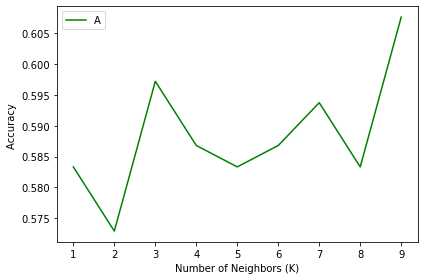

c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

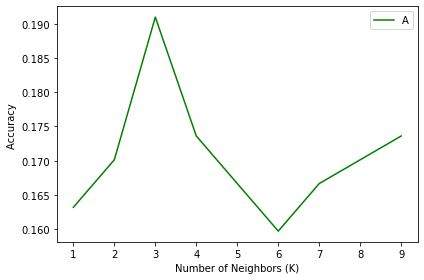

c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

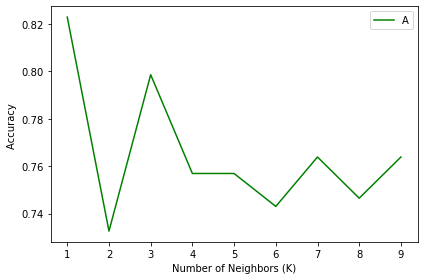

c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

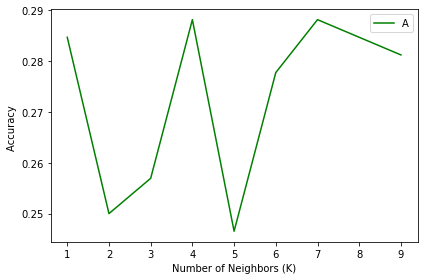

c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

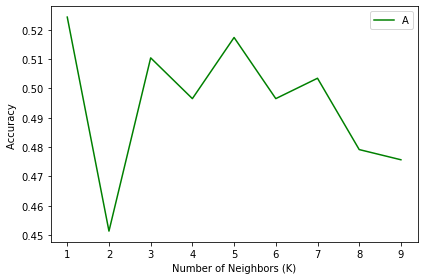

In [74]:
kShooser(force_df_fft,10,0.3,True);
kShooser(current_df_fft,10,0.3,True);
kShooser(torque_df_fft,10,0.3,True);
kShooser(speed_df_fft,10,0.3,True);
kShooser(vibration_df_fft,10,0.3,True);

In [75]:
a_f,c_f = knnLearning(force_df_fft,'Force features signal',3,0.3,True);
a_s,c_s = knnLearning(speed_df_fft,'Speed features signal',7,0.3,True);
a_c,c_c = knnLearning(current_df_fft,'Current features signal',3,0.3,True);
a_t,c_t = knnLearning(torque_df_fft,'Toque features signal',3,0.3,True);
a_v,c_v = knnLearning(vibration_df_fft,'Vibration features signal',4,0.3,True);

all = a_f.append([a_s,a_c,a_t,a_v])
all

c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

,Measurement,Algorithm,Accuracy score,Jaccard score,F1 score
,Force features signal,KNN,0.597222,0.438964,0.591345
,Speed features signal,KNN,0.288194,0.160739,0.274472
,Current features signal,KNN,0.190972,0.072233,0.124898
,Toque features signal,KNN,0.798611,0.675598,0.800013
,Vibration features signal,KNN,0.496528,0.338420,0.494789


c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

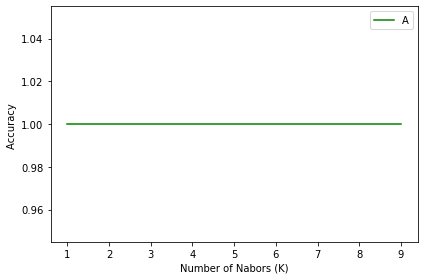

c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

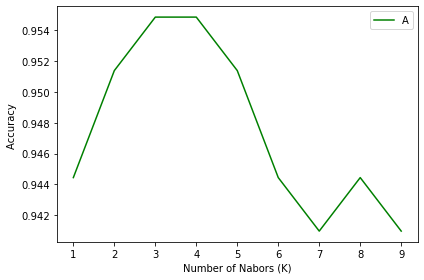

c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

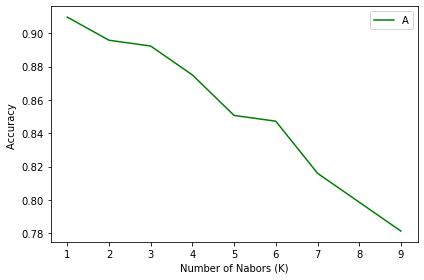

c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

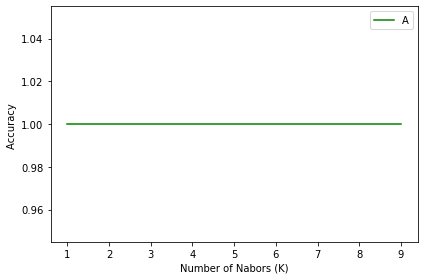

c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

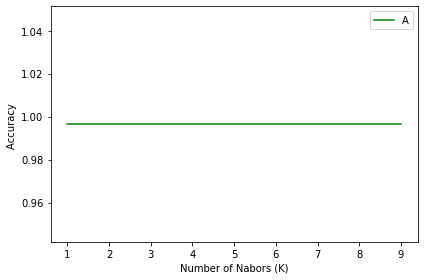

In [140]:
kShooser(force_df_encf,10,0.3,True);
kShooser(current_df_encf,10,0.3,True);
kShooser(torque_df_encf,10,0.3,True);
kShooser(speed_df_encf,10,0.3,True);
kShooser(vibration_df_encf,10,0.3,True);

In [22]:
a_f,c_f = knnLearning(force_df_encf,'Force features signal',4,0.3,True);
a_s,c_s = knnLearning(speed_df_encf,'Speed features signal',4,0.3,True);
a_c,c_c = knnLearning(current_df_encf,'Current features signal',3,0.3,True);
a_t,c_t = knnLearning(torque_df_encf,'Toque features signal',4,0.3,True);
a_v,c_v = knnLearning(vibration_df_encf,'Vibration features signal',7,0.3,True);

all = a_f.append([a_s,a_c,a_t,a_v])
all

c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

,Measurement,Algorithm,Accuracy score,Jaccard score,F1 score
,Force features signal,KNN,1.000000,1.000000,1.000000
,Speed features signal,KNN,1.000000,1.000000,1.000000
,Current features signal,KNN,0.930556,0.874595,0.928947
,Toque features signal,KNN,1.000000,1.000000,1.000000
,Vibration features signal,KNN,0.916667,0.847098,0.916665


c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

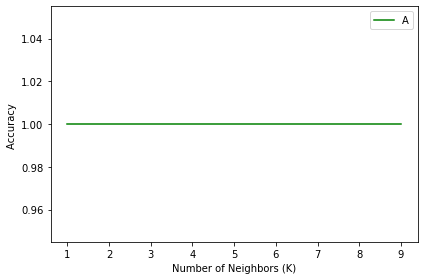

c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

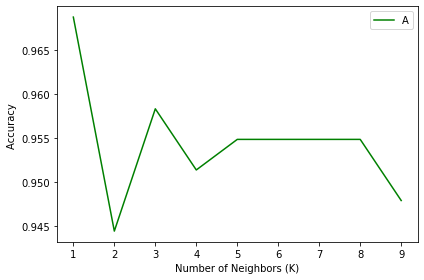

c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

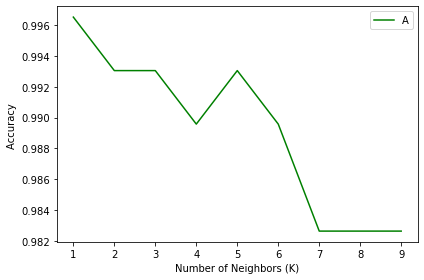

c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

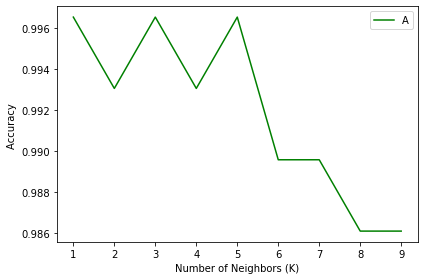

c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

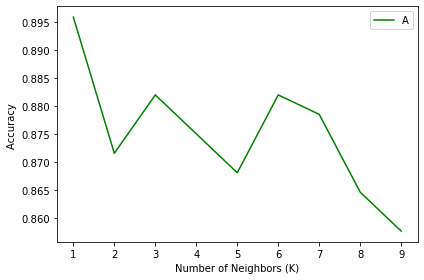

In [183]:
kShooser(force_df_encf_fft,10,0.3,True);
kShooser(current_df_encf_fft,10,0.3,True);
kShooser(torque_df_encf_fft,10,0.3,True);
kShooser(speed_df_encf_fft,10,0.3,True);
kShooser(vibration_df_encf_fft,10,0.3,True);

In [184]:
a_f,c_f = knnLearning(force_df_encf_fft,'Force features signal',4,0.3,True);
a_s,c_s = knnLearning(speed_df_encf_fft,'Speed features signal',3,0.3,True);
a_c,c_c = knnLearning(current_df_encf_fft,'Current features signal',4,0.3,True);
a_t,c_t = knnLearning(torque_df_encf_fft,'Toque features signal',3,0.3,True);
a_v,c_v = knnLearning(vibration_df_encf_fft,'Vibration features signal',3,0.3,True);

all = a_f.append([a_s,a_c,a_t,a_v])
all

c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

,Measurement,Algorithm,Accuracy score,Jaccard score,F1 score
,Force features signal,KNN,1.000000,1.000000,1.000000
,Speed features signal,KNN,0.996528,0.993101,0.996529
,Current features signal,KNN,0.951389,0.907970,0.951549
,Toque features signal,KNN,0.993056,0.986322,0.993062
,Vibration features signal,KNN,0.881944,0.797632,0.883352


c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

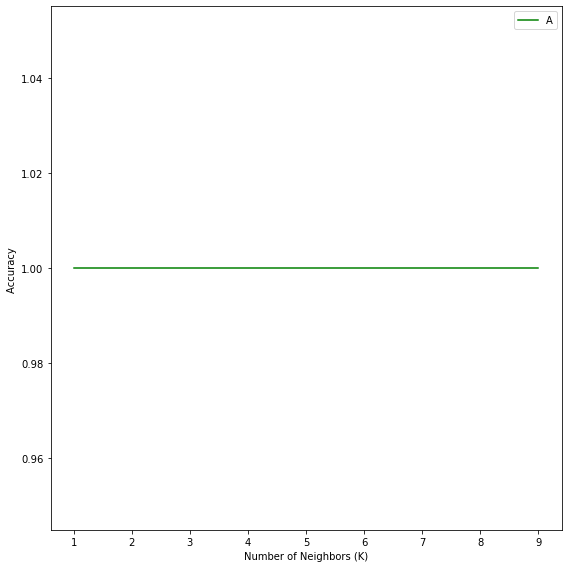

c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

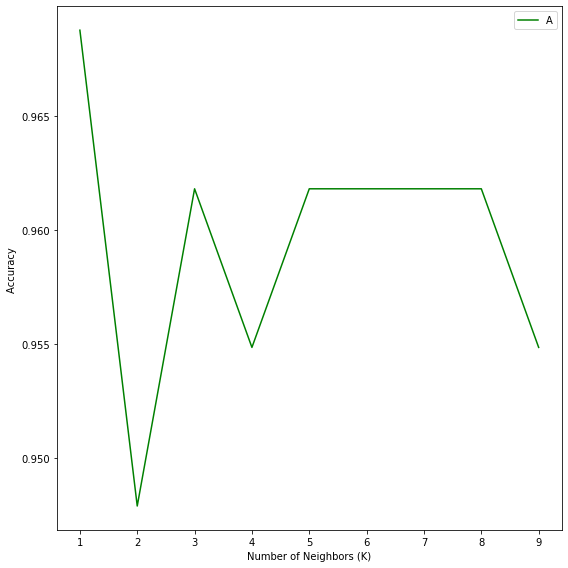

c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

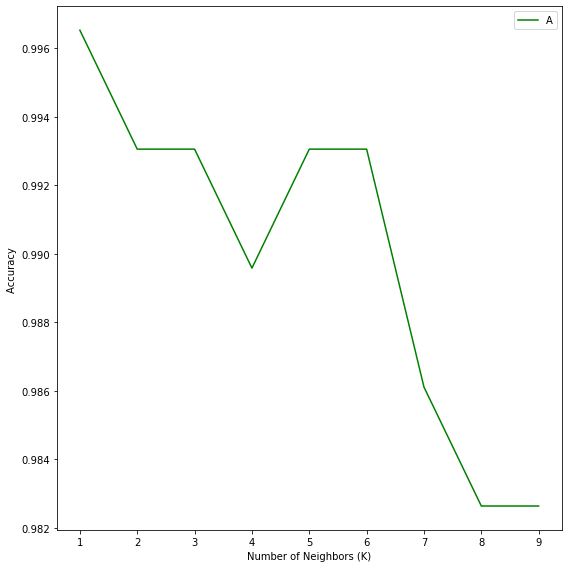

c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

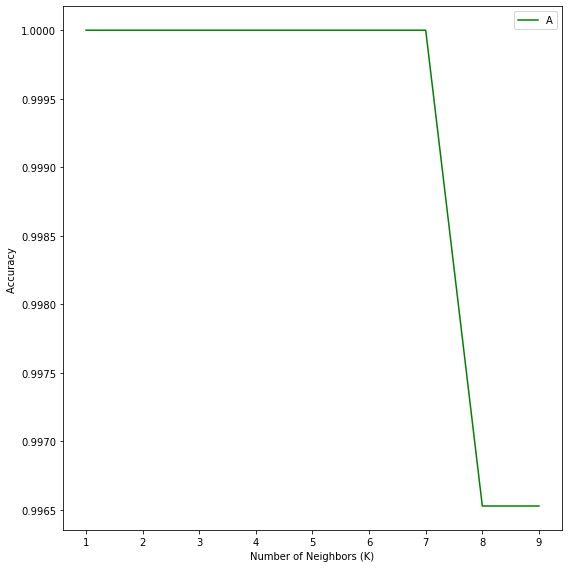

c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

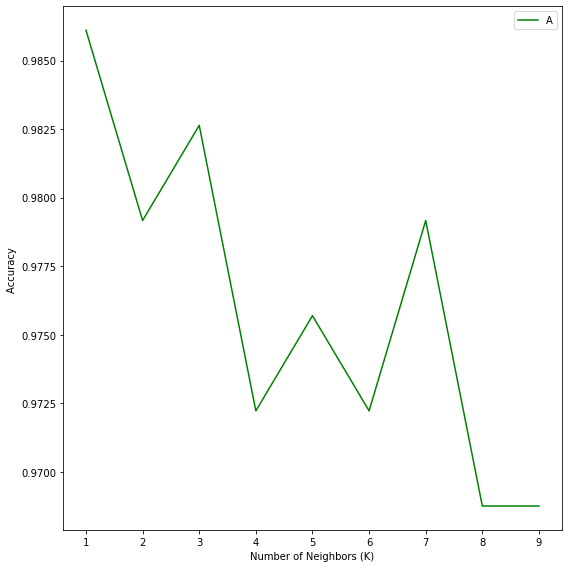

In [19]:
kShooser(force_df_enc,10,0.3,True);
kShooser(current_df_enc,10,0.3,True);
kShooser(torque_df_enc,10,0.3,True);
kShooser(speed_df_enc,10,0.3,True);
kShooser(vibration_df_enc,10,0.3,True);

c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:55: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


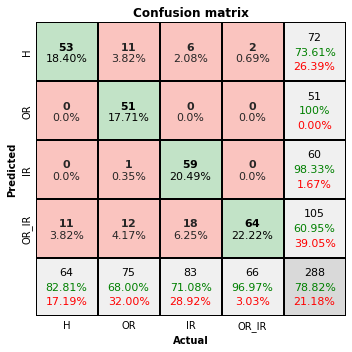

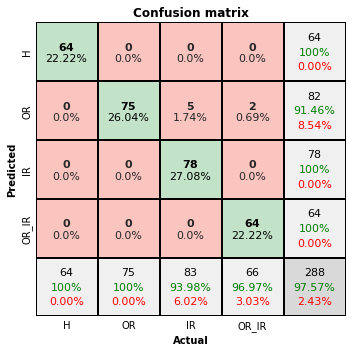

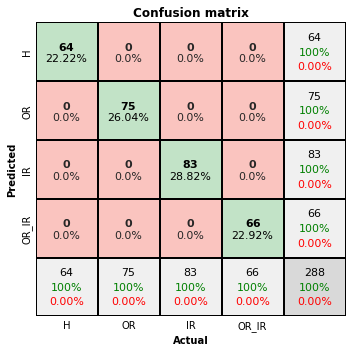

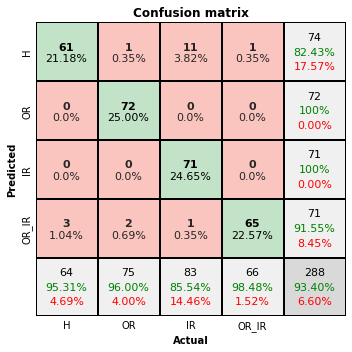

In [20]:

plot_from_data(comparision_current.iloc[0,:],comparision_current.iloc[1,:], columns=['H','OR','IR','OR_IR'], annot=True, cmap=cm_cmap,
     figname = 'prc_knn.jpg', fmt='.2f', fz=11, lw=1, cbar=False, figsize=[5,5], show_null_values=2, pred_val_axis='lin')
plot_from_data(comparision_vibration.iloc[0,:],comparision_vibration.iloc[1,:], columns=['H','OR','IR','OR_IR'], annot=True, cmap=cm_cmap,
      figname = 'prv_knn.jpg',fmt='.2f', fz=11, lw=1, cbar=False, figsize=[5,5], show_null_values=2, pred_val_axis='lin')
plot_from_data(comparision_speed.iloc[0,:],comparision_speed.iloc[1,:], columns=['H','OR','IR','OR_IR'], annot=True, cmap=cm_cmap,
      figname = 'prs_knn.jpg',fmt='.2f', fz=11, lw=1, cbar=False, figsize=[5,5], show_null_values=2, pred_val_axis='lin')
plot_from_data(comparision_torque.iloc[0,:],comparision_torque.iloc[1,:], columns=['H','OR','IR','OR_IR'], annot=True, cmap=cm_cmap,
      figname = 'prt_knn.jpg',fmt='.2f', fz=11, lw=1, cbar=False, figsize=[5,5], show_null_values=2, pred_val_axis='lin')



In [20]:
a_f,comparision_force = knnLearning(force_df_enc,'Force features signal',3,0.3,True);
a_s,comparision_speed = knnLearning(speed_df_enc,'Speed features signal',3,0.3,True);
a_c,comparision_current = knnLearning(current_df_enc,'Current features signal',4,0.3,True);
a_t,comparision_torque = knnLearning(torque_df_enc,'Toque features signal',3,0.3,True);
a_v,comparision_vibration = knnLearning(vibration_df_enc,'Vibration features signal',3,0.3,True);

all = a_f.append([a_s,a_c,a_t,a_v])
all

c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

,Measurement,Algorithm,Accuracy score,Jaccard score,F1 score
,Force features signal,KNN,1.000000,1.000000,1.000000
,Speed features signal,KNN,1.000000,1.000000,1.000000
,Current features signal,KNN,0.954861,0.914653,0.955165
,Toque features signal,KNN,0.993056,0.986322,0.993062
,Vibration features signal,KNN,0.982639,0.966363,0.982577


c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:55: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


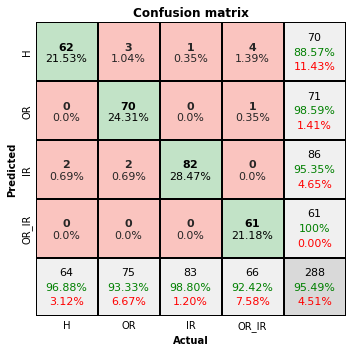

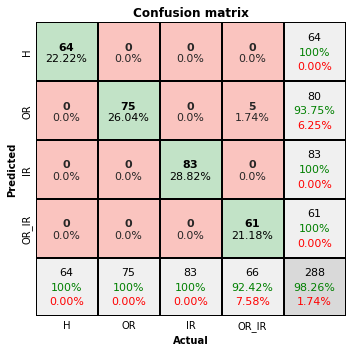

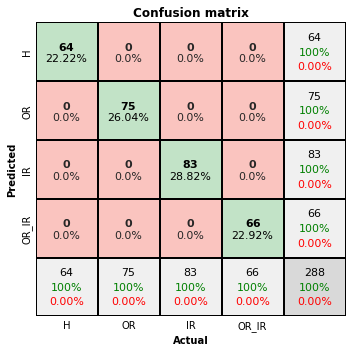

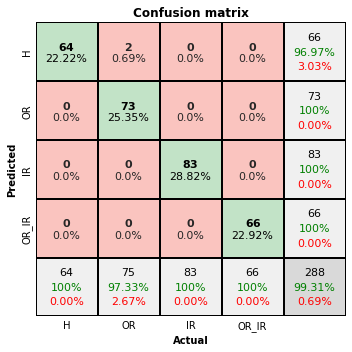

In [21]:

plot_from_data(comparision_current.iloc[0,:],comparision_current.iloc[1,:], columns=['H','OR','IR','OR_IR'], annot=True, cmap=cm_cmap,
     figname = 'prc_knn.jpg', fmt='.2f', fz=11, lw=1, cbar=False, figsize=[5,5], show_null_values=2, pred_val_axis='lin')
plot_from_data(comparision_vibration.iloc[0,:],comparision_vibration.iloc[1,:], columns=['H','OR','IR','OR_IR'], annot=True, cmap=cm_cmap,
      figname = 'prv_knn.jpg',fmt='.2f', fz=11, lw=1, cbar=False, figsize=[5,5], show_null_values=2, pred_val_axis='lin')
plot_from_data(comparision_speed.iloc[0,:],comparision_speed.iloc[1,:], columns=['H','OR','IR','OR_IR'], annot=True, cmap=cm_cmap,
      figname = 'prs_knn.jpg',fmt='.2f', fz=11, lw=1, cbar=False, figsize=[5,5], show_null_values=2, pred_val_axis='lin')
plot_from_data(comparision_torque.iloc[0,:],comparision_torque.iloc[1,:], columns=['H','OR','IR','OR_IR'], annot=True, cmap=cm_cmap,
      figname = 'prt_knn.jpg',fmt='.2f', fz=11, lw=1, cbar=False, figsize=[5,5], show_null_values=2, pred_val_axis='lin')


In [191]:
accuracy_force,comparision_force = mlpLearning(force_df,'Force signal ',(20,10,20),1000,0.3,True)
accuracy_current,comparision_current = mlpLearning(current_df,'Current signal ',(20,10,20),1000,0.3,True)
accuracy_torque,comparision_torque = mlpLearning(torque_df,'Torque signal ',(20,10,20),1000,0.3,True)
accuracy_speed,comparision_speed = mlpLearning(speed_df,'Speed signal ',(20,10,20),1000,0.3,True)
accuracy_vibration,comparision_vibration = mlpLearning(vibration_df,'Vibration signal ',(20,10,20),1000,0.3,True)
all = accuracy_force.append([accuracy_current,accuracy_torque,accuracy_speed,accuracy_vibration])
all

c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed w

,Measurement,Algorithm,Accuracy score,Jaccard score,F1 score
,Force signal,MLP,0.288194,0.138103,0.230938
,Current signal,MLP,0.277778,0.157435,0.269669
,Torque signal,MLP,0.274306,0.139100,0.233930
,Speed signal,MLP,0.201389,0.069809,0.120416
,Vibration signal,MLP,0.395833,0.232641,0.365099


In [169]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt



def matchPlot(df1,df2,mes=False,figname=False):
    df1 = df1.values
    df2 = df2.values
    rslt = [];
    for i in range(0,len(df1)):
      if(df1[i] == df2[i]):
        rslt.append('blue')        
      else:
        rslt.append('yellow') 
    a = mpatches.Patch(color='blue', label='Correct prediction')
    b = mpatches.Patch(color='yellow', label='False prediction')
    plt.scatter(np.linspace(0,len(rslt),len(rslt)),df2,c=rslt)
    plt.legend(handles=[a,b])
    
    if mes:
       plt.title(mes +' measurement')
    if(figname):
      plt.savefig(figname, dpi=200)
    plt.show()

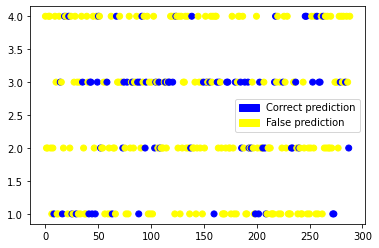

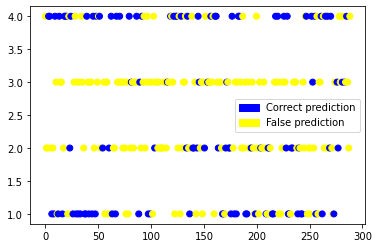

In [192]:
matchPlot(comparision_current.iloc[1,:],comparision_current.iloc[0,:],figname='prediction1.jpg')
matchPlot(comparision_vibration.iloc[1,:],comparision_vibration.iloc[0,:],figname='prediction2.jpg')

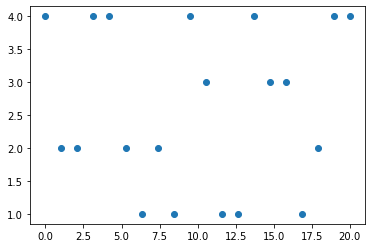

In [69]:
x_axis = np.linspace(0,comparision_current.iloc[0,0:20].shape[0],20)
plt.scatter(x_axis,intersect(x_axis,comparision_current.iloc[0,0:20],comparision_current.iloc[1,0:20]))




In [35]:
comparision_vibration.T

,State,Predicted State
0,4.0,1.0
1,2.0,1.0
2,2.0,4.0
3,4.0,4.0
4,4.0,4.0
...,...,...
283,3.0,2.0
284,4.0,4.0
285,3.0,1.0
286,2.0,3.0


In [31]:
comparision_current.iloc[0,:]

0      4.0
1      2.0
2      2.0
3      4.0
4      4.0
      ... 
283    3.0
284    4.0
285    3.0
286    2.0
287    4.0
Name: State, Length: 288, dtype: float64

In [26]:
comparision_current.iloc[0,:].shape[0]

288

In [22]:
a = 1:1:4

SyntaxError: invalid syntax (<ipython-input-22-dd2a443d5892>, line 1)

c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:55: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


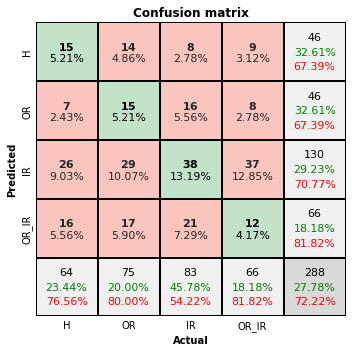

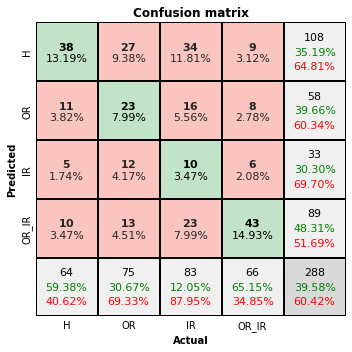

In [50]:
plot_from_data(comparision_current.iloc[0,:],comparision_current.iloc[1,:], columns=['H','OR','IR','OR_IR'], annot=True, cmap=cm_cmap,
     figname = 'pr1.jpg', fmt='.2f', fz=11, lw=1, cbar=False, figsize=[5,5], show_null_values=2, pred_val_axis='lin')

plot_from_data(comparision_vibration.iloc[0,:],comparision_vibration.iloc[1,:], columns=['H','OR','IR','OR_IR'], annot=True, cmap=cm_cmap,
      figname = 'pr2.jpg',fmt='.2f', fz=11, lw=1, cbar=False, figsize=[5,5], show_null_values=2, pred_val_axis='lin')


In [193]:
accuracy_force,comparision_force = mlpLearning(force_df_fft,'Force signal features',(20,10,20),1000,0.3,True)
accuracy_current,comparision_current = mlpLearning(current_df_fft,'Current signal features',(20,10,20),1000,0.3,True)
accuracy_torque,comparision_torque = mlpLearning(torque_df_fft,'Torque signal features',(20,10,20),1000,0.3,True)
accuracy_speed,comparision_speed = mlpLearning(speed_df_fft,'Speed signal features',(20,10,20),1000,0.3,True)
accuracy_vibration,comparision_vibration = mlpLearning(vibration_df_fft,'Vibration signal features',(20,10,20),1000,0.3,True)
all = accuracy_force.append([accuracy_current,accuracy_torque,accuracy_speed,accuracy_vibration])
all

c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed w

,Measurement,Algorithm,Accuracy score,Jaccard score,F1 score
,Force signal features,MLP,0.951389,0.908756,0.950861
,Current signal features,MLP,0.427083,0.273796,0.416942
,Torque signal features,MLP,0.850694,0.749243,0.851119
,Speed signal features,MLP,0.309028,0.177825,0.299661
,Vibration signal features,MLP,0.770833,0.642011,0.773529


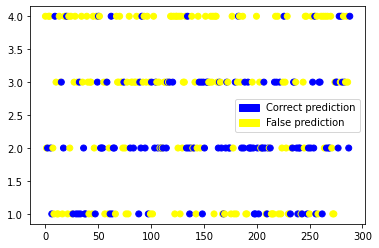

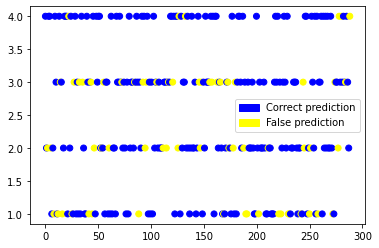

In [195]:
matchPlot(comparision_current.iloc[1,:],comparision_current.iloc[0,:],figname='prediction1.jpg')
matchPlot(comparision_vibration.iloc[1,:],comparision_vibration.iloc[0,:],figname='prediction2.jpg')

c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:55: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


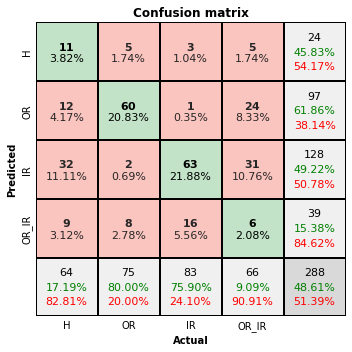

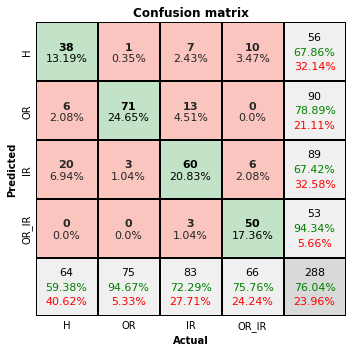

In [77]:
plot_from_data(comparision_current.iloc[0,:],comparision_current.iloc[1,:], columns=['H','OR','IR','OR_IR'], annot=True, cmap=cm_cmap,
     figname = 'pr1.jpg', fmt='.2f', fz=11, lw=1, cbar=False, figsize=[5,5], show_null_values=2, pred_val_axis='lin')

plot_from_data(comparision_vibration.iloc[0,:],comparision_vibration.iloc[1,:], columns=['H','OR','IR','OR_IR'], annot=True, cmap=cm_cmap,
      figname = 'pr2.jpg',fmt='.2f', fz=11, lw=1, cbar=False, figsize=[5,5], show_null_values=2, pred_val_axis='lin')


In [24]:
accuracy_force,comparision_force = mlpLearning(force_df_encf,'Force signal extracted features',(20,10,20),1000,0.3,True)
accuracy_current,comparision_current = mlpLearning(current_df_encf,'Current signal extracted features',(20,10,20),2000,0.3,True)
accuracy_torque,comparision_torque = mlpLearning(torque_df_encf,'Torque signal extracted features',(20,10,20),1000,0.3,True)
accuracy_speed,comparision_speed = mlpLearning(speed_df_encf,'Speed signal extracted features',(20,10,20),1000,0.3,True)
accuracy_vibration,comparision_vibration = mlpLearning(vibration_df_encf,'Vibration signal extracted features',(20,10,20),1000,0.3,True)
all = accuracy_force.append([accuracy_current,accuracy_torque,accuracy_speed,accuracy_vibration])
all

c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed w

,Measurement,Algorithm,Accuracy score,Jaccard score,F1 score
,Force signal extracted features,MLP,1.000000,1.000000,1.000000
,Current signal extracted features,MLP,0.538194,0.344737,0.504896
,Torque signal extracted features,MLP,0.989583,0.979530,0.989569
,Speed signal extracted features,MLP,1.000000,1.000000,1.000000
,Vibration signal extracted features,MLP,0.975694,0.952995,0.975621


c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:55: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


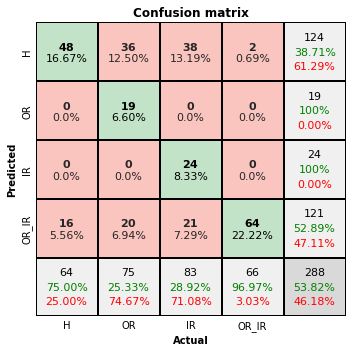

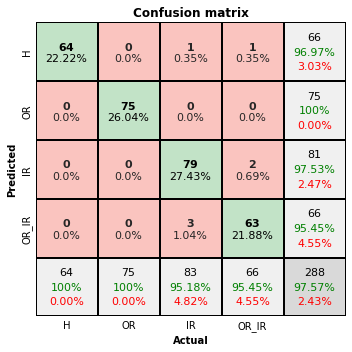

In [180]:
plot_from_data(comparision_current.iloc[0,:],comparision_current.iloc[1,:], columns=['H','OR','IR','OR_IR'], annot=True, cmap=cm_cmap,
     figname = 'pr1.jpg', fmt='.2f', fz=11, lw=1, cbar=False, figsize=[5,5], show_null_values=2, pred_val_axis='lin')

plot_from_data(comparision_vibration.iloc[0,:],comparision_vibration.iloc[1,:], columns=['H','OR','IR','OR_IR'], annot=True, cmap=cm_cmap,
      figname = 'pr2.jpg',fmt='.2f', fz=11, lw=1, cbar=False, figsize=[5,5], show_null_values=2, pred_val_axis='lin')


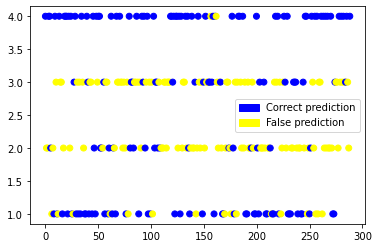

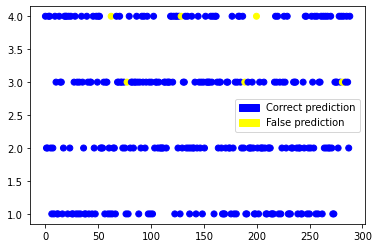

In [197]:
matchPlot(comparision_current.iloc[1,:],comparision_current.iloc[0,:],figname='prediction1.jpg')
matchPlot(comparision_vibration.iloc[1,:],comparision_vibration.iloc[0,:],figname='prediction2.jpg')

In [29]:
accuracy_force,comparision_force = mlpLearning(force_df_encf_fft,'Force signal extracted features',(20,10,20),1000,0.3,True)
accuracy_current,comparision_current = mlpLearning(current_df_encf_fft,'Current signal extracted features',(20,10,20),1000,0.3,True)
accuracy_torque,comparision_torque = mlpLearning(torque_df_encf_fft,'Torque signal extracted features',(20,10,20),1000,0.3,True)
accuracy_speed,comparision_speed = mlpLearning(speed_df_encf_fft,'Speed signal extracted features',(20,10,20),1000,0.3,True)
accuracy_vibration,comparision_vibration = mlpLearning(vibration_df_encf_fft,'Vibration signal extracted features',(20,10,20),1000,0.3,True)
all = accuracy_force.append([accuracy_current,accuracy_torque,accuracy_speed,accuracy_vibration])
all

c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed w

,Measurement,Algorithm,Accuracy score,Jaccard score,F1 score
,Force signal extracted features,MLP,1.000000,1.000000,1.000000
,Current signal extracted features,MLP,0.947917,0.903066,0.947899
,Torque signal extracted features,MLP,0.993056,0.986259,0.993054
,Speed signal extracted features,MLP,0.996528,0.993101,0.996529
,Vibration signal extracted features,MLP,0.927083,0.865138,0.926331


c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:55: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


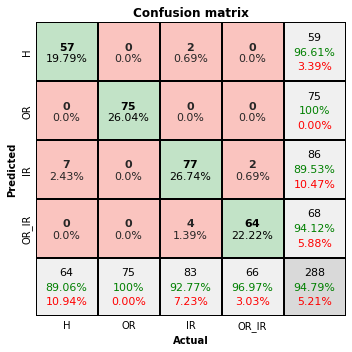

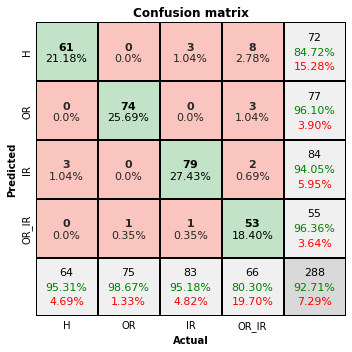

In [30]:
plot_from_data(comparision_current.iloc[0,:],comparision_current.iloc[1,:], columns=['H','OR','IR','OR_IR'], annot=True, cmap=cm_cmap,
     figname = 'pr1.jpg', fmt='.2f', fz=11, lw=1, cbar=False, figsize=[5,5], show_null_values=2, pred_val_axis='lin')

plot_from_data(comparision_vibration.iloc[0,:],comparision_vibration.iloc[1,:], columns=['H','OR','IR','OR_IR'], annot=True, cmap=cm_cmap,
      figname = 'pr2.jpg',fmt='.2f', fz=11, lw=1, cbar=False, figsize=[5,5], show_null_values=2, pred_val_axis='lin')


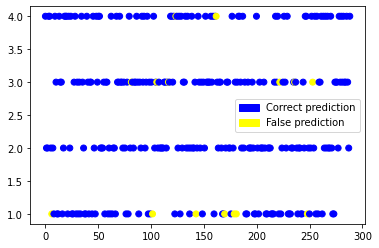

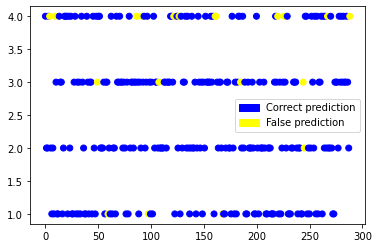

In [190]:
matchPlot(comparision_current.iloc[1,:],comparision_current.iloc[0,:],figname='prediction1.jpg')
matchPlot(comparision_vibration.iloc[1,:],comparision_vibration.iloc[0,:],figname='prediction2.jpg')

In [21]:
accuracy_force,comparision_force = mlpLearning(force_df_enc,'Force signal extracted features',(20,10,20),1000,0.3,True)
accuracy_current,comparision_current = mlpLearning(current_df_enc,'Current signal extracted features',(20,10,20),1000,0.3,True)
accuracy_torque,comparision_torque = mlpLearning(torque_df_enc,'Torque signal extracted features',(20,10,20),1000,0.3,True)
accuracy_speed,comparision_speed = mlpLearning(speed_df_enc,'Speed signal extracted features',(20,10,20),1000,0.3,True)
accuracy_vibration,comparision_vibration = mlpLearning(vibration_df_enc,'Vibration signal extracted features',(20,10,20),1000,0.3,True)
all = accuracy_force.append([accuracy_current,accuracy_torque,accuracy_speed,accuracy_vibration])
all

c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed w

,Measurement,Algorithm,Accuracy score,Jaccard score,F1 score
,Force signal extracted features,MLP,1.000000,1.000000,1.000000
,Current signal extracted features,MLP,0.972222,0.946145,0.972164
,Torque signal extracted features,MLP,1.000000,1.000000,1.000000
,Speed signal extracted features,MLP,1.000000,1.000000,1.000000
,Vibration signal extracted features,MLP,0.993056,0.986275,0.993043


c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:55: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


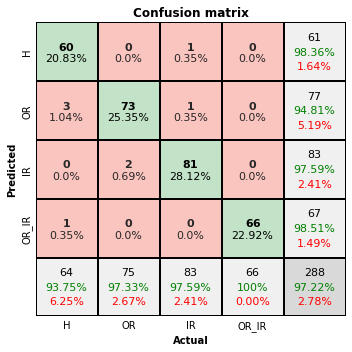

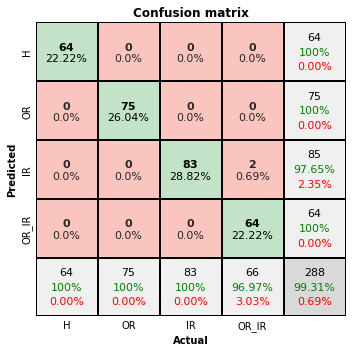

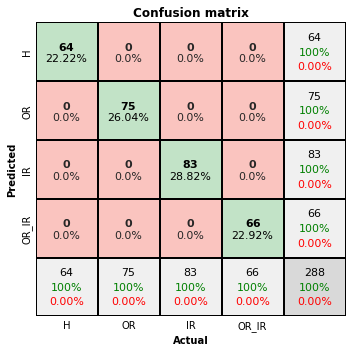

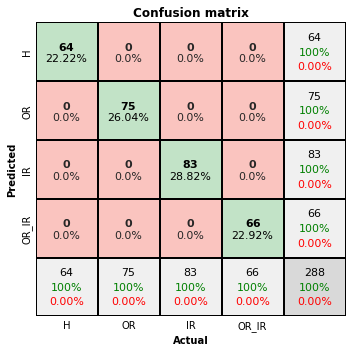

In [22]:

plot_from_data(comparision_current.iloc[0,:],comparision_current.iloc[1,:], columns=['H','OR','IR','OR_IR'], annot=True, cmap=cm_cmap,
     figname = 'prc_mlp.jpg', fmt='.2f', fz=11, lw=1, cbar=False, figsize=[5,5], show_null_values=2, pred_val_axis='lin')
plot_from_data(comparision_vibration.iloc[0,:],comparision_vibration.iloc[1,:], columns=['H','OR','IR','OR_IR'], annot=True, cmap=cm_cmap,
      figname = 'prv_mlp.jpg',fmt='.2f', fz=11, lw=1, cbar=False, figsize=[5,5], show_null_values=2, pred_val_axis='lin')
plot_from_data(comparision_speed.iloc[0,:],comparision_speed.iloc[1,:], columns=['H','OR','IR','OR_IR'], annot=True, cmap=cm_cmap,
      figname = 'prs_mlp.jpg',fmt='.2f', fz=11, lw=1, cbar=False, figsize=[5,5], show_null_values=2, pred_val_axis='lin')
plot_from_data(comparision_torque.iloc[0,:],comparision_torque.iloc[1,:], columns=['H','OR','IR','OR_IR'], annot=True, cmap=cm_cmap,
      figname = 'prt_mlp.jpg',fmt='.2f', fz=11, lw=1, cbar=False, figsize=[5,5], show_null_values=2, pred_val_axis='lin')



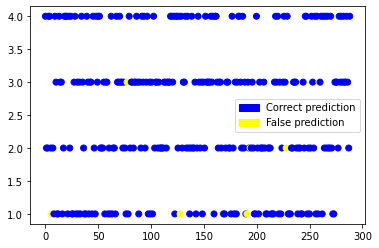

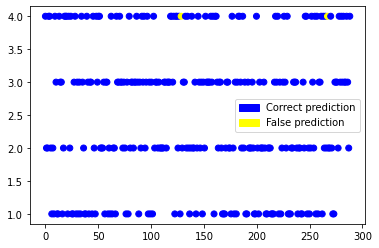

In [202]:
matchPlot(comparision_current.iloc[1,:],comparision_current.iloc[0,:],figname='prediction1.jpg')
matchPlot(comparision_vibration.iloc[1,:],comparision_vibration.iloc[0,:],figname='prediction2.jpg')

In [28]:
import pip
pip.main(['install','seaborn'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


  Using cached seaborn-0.11.1-py3-none-any.whl (285 kB)


You should consider upgrading via the 'c:\users\salah\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


0

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sn

from pandas import DataFrame
from matplotlib.collections import QuadMesh
from sklearn.metrics import confusion_matrix
from matplotlib.colors import LinearSegmentedColormap


colors = [(0.98, 0.77, 0.75), (0.98, 0.77, 0.75)]
cm_cmap = LinearSegmentedColormap.from_list('cm_color', colors, N=1)


def get_new_fig(fn, figsize=[9,9]):
    """ Init graphics """
    fig1 = plt.figure(fn, figsize)
    ax1 = fig1.gca()    #Get Current Axis
    ax1.cla()   # clear existing plot
    return fig1, ax1

def configcell_text_and_colors(array_df, lin, col, oText, facecolors, posi, fz, fmt, show_null_values=0):
    """
      config cell text and colors
      and return text elements to add and to dell
      @TODO: use fmt
    """
    text_add = []; text_del = [];
    cell_val = array_df[lin][col]
    tot_all = array_df[-1][-1]
    per = (float(cell_val) / tot_all) * 100
    curr_column = array_df[:,col]
    ccl = len(curr_column)

    #last line  and/or last column
    if(col == (ccl - 1)) or (lin == (ccl - 1)):
        #tots and percents
        if(cell_val != 0):
            if(col == ccl - 1) and (lin == ccl - 1):
                tot_rig = 0
                for i in range(array_df.shape[0] - 1):
                    tot_rig += array_df[i][i]
                per_ok = (float(tot_rig) / cell_val) * 100
            elif(col == ccl - 1):
                tot_rig = array_df[lin][lin]
                per_ok = (float(tot_rig) / cell_val) * 100
            elif(lin == ccl - 1):
                tot_rig = array_df[col][col]
                per_ok = (float(tot_rig) / cell_val) * 100
            per_err = 100 - per_ok
        else:
            per_ok = per_err = 0

        per_ok_s = ['%.2f%%'%(per_ok), '100%'] [per_ok == 100]

        #text to DEL
        text_del.append(oText)

        #text to ADD
        font_prop = fm.FontProperties(size=fz)
        text_kwargs = dict(color='black', ha="center", va="center", gid='sum', fontproperties=font_prop)
        lis_txt = ['%d'%(cell_val), per_ok_s, '%.2f%%'%(per_err)]
        lis_kwa = [text_kwargs]
        dic = text_kwargs.copy(); dic['color'] = 'g'; lis_kwa.append(dic);
        dic = text_kwargs.copy(); dic['color'] = 'r'; lis_kwa.append(dic);
        lis_pos = [(oText._x, oText._y-0.25), (oText._x, oText._y), (oText._x, oText._y+0.25)]
        for i in range(len(lis_txt)):
            newText = dict(x=lis_pos[i][0], y=lis_pos[i][1], text=lis_txt[i], kw=lis_kwa[i])
            text_add.append(newText)

        #set background color for sum cells (last line and last column)
        carr = [0.94, 0.94, 0.94, 1.0]
        if(col == ccl - 1) and (lin == ccl - 1):
            carr = [0.85, 0.85, 0.85, 1.0]
        facecolors[posi] = carr

    else:
        if(per > 0):
            txt = '$\mathbf{%s}$\n%.2f%%' %(cell_val, per)
        else:
            # pass
            if(show_null_values == 0):
                txt = ''
            elif(show_null_values == 1):
                txt = '0'
            else:
                txt = '$\mathbf{0}$\n0.0%'
        oText.set_text(txt)

        #main diagonal
        if(col == lin):
            #set color of the textin the diagonal to white
            oText.set_color('black')
            # set background color in the diagonal to blue
            facecolors[posi] = [0.76, 0.89, 0.78, 1.0]

    return text_add, text_del

def insert_totals(df_cm):
    """ insert total column and line (the last ones) """
    sum_col = []
    for c in df_cm.columns:
        sum_col.append( df_cm[c].sum() )
    sum_lin = []
    for item_line in df_cm.iterrows():
        sum_lin.append( item_line[1].sum() )
    df_cm['sum_lin'] = sum_lin
    sum_col.append(np.sum(sum_lin))
    df_cm.loc['sum_col'] = sum_col

def plot_pretty_confusion_matrix(df_cm,figname, annot=True, cmap=cm_cmap, fmt='.2f', fz=11,
      lw=2, cbar=False, figsize=[5,5], show_null_values=2, pred_val_axis='y'):
    """
      print conf matrix with default layout (like matlab)
      params:
        df_cm          dataframe (pandas) without totals
        annot          print text in each cell
        cmap           Oranges,Oranges_r,YlGnBu,Blues,RdBu, ... see:
        fz             fontsize
        lw             linewidth
        pred_val_axis  where to show the prediction values (x or y axis)
                        'col' or 'x': show predicted values in columns (x axis) instead lines
                        'lin' or 'y': show predicted values in lines   (y axis)
    """
    if(pred_val_axis in ('col', 'x')):
        xlbl = 'Predicted'
        ylbl = 'Actual'
    else:
        xlbl = 'Actual'
        ylbl = 'Predicted'
        df_cm = df_cm.T

    # create "Total" column
    insert_totals(df_cm)

    #this is for print allways in the same window
    fig, ax1 = get_new_fig('Conf matrix default', figsize)

    #thanks for seaborn
    ax = sn.heatmap(df_cm, annot=annot, annot_kws={"size": fz}, linewidths=lw, ax=ax1,
                    cbar=cbar, cmap=cmap, linecolor='black', fmt=fmt)

    #set ticklabels rotation
    # ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, fontsize = 10)
    # ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 10)

    # Turn off all the ticks
    for t in ax.xaxis.get_major_ticks():
        t.tick1line.set_visible = False
        t.tick2line.set_visible = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1line.set_visible = False
        t.tick2line.set_visible = False

    #face colors list
    quadmesh = ax.findobj(QuadMesh)[0]
    facecolors = quadmesh.get_facecolors()

    #iter in text elements
    array_df = np.array( df_cm.to_records(index=False).tolist() )
    text_add = []
    text_del = []
    posi = -1 #from left to right, bottom to top.
    for t in ax.collections[0].axes.texts:
        pos = np.array( t.get_position()) - [0.5,0.5]
        lin = int(pos[1]); col = int(pos[0])
        posi += 1

        #set text
        txt_res = configcell_text_and_colors(array_df, lin, col, t, facecolors, posi, fz, fmt, show_null_values)

        text_add.extend(txt_res[0])
        text_del.extend(txt_res[1])

    #remove the old ones
    for item in text_del:
        item.remove()
    #append the new ones
    for item in text_add:
        ax.text(item['x'], item['y'], item['text'], **item['kw'])

    #titles and legends
    ax.set_title('Confusion matrix', fontdict={"weight": "bold"})
    ax.set_xlabel(xlbl, fontdict={"weight": "bold"})
    ax.set_ylabel(ylbl, fontdict={"weight": "bold"})
    
    ax.tick_params(axis=u'both', which=u'both',length=0)

    ax.set_xticklabels(df_cm.columns[:-1], fontdict={"horizontalalignment": "center"})
    ax.set_yticklabels(df_cm.index[:-1], fontdict={"verticalalignment": "center"})

    plt.tight_layout()
    plt.savefig(figname, dpi=200)
    plt.show()
    

def plot_from_confusion_matrix(cm,figname, columns=None, annot=True, cmap=cm_cmap,
      fmt='.2f', fz=11, lw=1, cbar=False, figsize=[5,5], show_null_values=2, pred_val_axis='lin'):

    df_cm = DataFrame(cm, index=columns, columns=columns)
    plot_pretty_confusion_matrix(df_cm,figname, fz=fz, lw=lw, cmap=cmap, figsize=figsize, show_null_values=show_null_values, pred_val_axis=pred_val_axis)

def plot_from_data(y_test, predictions, columns=None, annot=True, cmap=cm_cmap,
      fmt='.2f', fz=11, lw=1, cbar=False, figsize=[5,5], show_null_values=2, pred_val_axis='lin',figname='fig.jpg'):
    """
        plot confusion matrix function with y_test (actual values) and predictions (predic),
        whitout a confusion matrix yet
    """

    #data
    if(not columns):
        from string import ascii_uppercase
        columns = ['class %s' %(i) for i in list(ascii_uppercase)[0:len(np.unique(y_test))]]

    confm = confusion_matrix(y_test, predictions)
    df_cm = DataFrame(confm, index=columns, columns=columns)
    plot_pretty_confusion_matrix(df_cm,figname, fz=fz, lw=lw, cmap=cmap, figsize=figsize, show_null_values=show_null_values, pred_val_axis=pred_val_axis)

c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:55: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


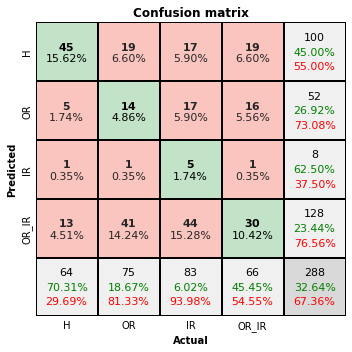

In [43]:
plot_from_data(comparision_current.iloc[0,:],comparision_current.iloc[1,:], columns=['H','OR','IR','OR_IR'], annot=True, cmap=cm_cmap,
      fmt='.2f', fz=11, lw=1, cbar=False, figsize=[5,5], show_null_values=2, pred_val_axis='lin')